# Decision Tree

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## import dataset

- User ID: The id of each user (每位使用者的 ID)
- Gender: 使用者的性別
- Age: 年齡
- EstimatedSalary: 預估薪水
- Purchased: 是否購買產品 (0: 沒有, 1: 有)

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


## Draw the scatter plot

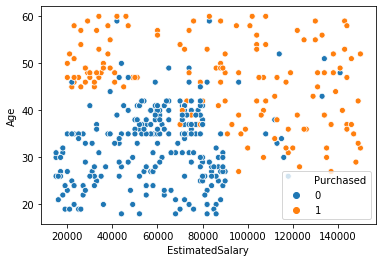

In [5]:
sns.scatterplot(x=df.EstimatedSalary, y=df.Age, hue = df.Purchased)

## Split dataset

In [6]:
cols = ['Age','EstimatedSalary']
x = df[cols]
y = df[['Purchased']]
print(x.head())
print(y.head())

    Age  EstimatedSalary
0  19.0          19000.0
1  35.0          20000.0
2  26.0          43000.0
3  27.0          57000.0
4  19.0          76000.0
   Purchased
0          0
1          0
2          0
3          0
4          0


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

## Train the decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
c = DecisionTreeClassifier(criterion='gini')
c.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Evaluate the performance of the tree


In [9]:
from sklearn.metrics import accuracy_score
y_train_pred = c.predict(x_train)
acc1 = accuracy_score(y_train, y_train_pred)
print("The accuracy on the training set is %.2f" % (acc1))
y_pred = c.predict(x_test)
acc2 = accuracy_score(y_test, y_pred)
print("The accuracy on the test set is %.2f" % (acc2))

The accuracy on the training set is 1.00
The accuracy on the test set is 0.88


## Draw the confusion matrix

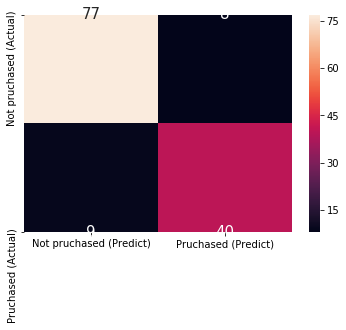

In [22]:
from sklearn.metrics import confusion_matrix
#plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['Not pruchased (Actual)', 'Pruchased (Actual)'],
                  columns = ['Not pruchased (Predict)', 'Pruchased (Predict)'])
sns.heatmap(df_cm,  annot = True, annot_kws = {'size':15}, xticklabels=df_cm.columns, yticklabels=df_cm.index)

In [21]:
cm

array([[77,  8],
       [ 9, 40]], dtype=int64)

In [13]:
df_cm

,Not pruchased (Predict),Pruchased (Predict)
Not pruchased (Actual),77,8
Pruchased (Actual),9,40


In [23]:
from sklearn.metrics import precision_score, recall_score
# get precision
precision_score(y_test, y_pred)

0.8333333333333334

In [24]:
#get recall
recall_score(y_test, y_pred)

0.8163265306122449

In [25]:
from sklearn.metrics import accuracy_score
print("準確率 %.2f" % (accuracy_score(y_test, y_pred)))


準確率 0.87


In [26]:
print("Age 的重要性 %.2f" % (classifier.feature_importances_[0]))
print("EstimatedSalary 的重要性 %.2f" % (classifier.feature_importances_[1]))

Age 的重要性 0.52
EstimatedSalary 的重要性 0.48


## Use Graphviz to draw the decision tree

Download Graphviz from [https://graphviz.gitlab.io/_pages/Download/Download_windows.html](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)

In [27]:
from sklearn import tree
dot_data = tree.export_graphviz(classifier,  
                                out_file='tree.dot',
                    feature_names = ['Age', 'EstimatedSalary'],
                    class_names = ['0', '1'],
                    filled=True, rounded=True,
                    special_characters=True)


## Check the effect of the max_depth 

底下的程式碼中，我們測試 max_depth 這個參數對效能的影響

Level 1
準確率 0.83 (訓練)
準確率 0.85 (測試)
Level 2
準確率 0.91 (訓練)
準確率 0.92 (測試)
Level 3
準確率 0.92 (訓練)
準確率 0.90 (測試)
Level 4
準確率 0.93 (訓練)
準確率 0.89 (測試)
Level 5
準確率 0.95 (訓練)
準確率 0.90 (測試)
Level 6
準確率 0.95 (訓練)
準確率 0.89 (測試)
Level 7
準確率 0.95 (訓練)
準確率 0.90 (測試)
Level 8
準確率 0.97 (訓練)
準確率 0.90 (測試)
Level 9
準確率 0.97 (訓練)
準確率 0.87 (測試)
Level 10
準確率 0.98 (訓練)
準確率 0.87 (測試)
Level 11
準確率 0.99 (訓練)
準確率 0.88 (測試)
Level 12
準確率 1.00 (訓練)
準確率 0.88 (測試)
Level 13
準確率 1.00 (訓練)
準確率 0.87 (測試)
Level 14
準確率 1.00 (訓練)
準確率 0.88 (測試)
Level 15
準確率 1.00 (訓練)
準確率 0.87 (測試)


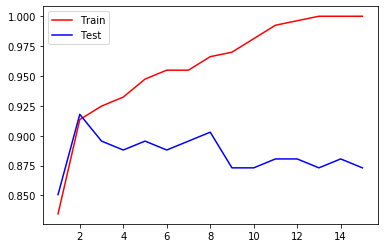

In [10]:
tree_depth = []
acc_train = [] #The accuracy on the train dataset
acc_test = [] # The accuracy on the test dataset

for i in range(15):
    classifier = DecisionTreeClassifier(criterion = 'gini', max_depth=i+1)
    classifier.fit(x_train, y_train)
    classifier.score(x_train, y_train)
    y_pred_train = classifier.predict(x_train)
    y_pred = classifier.predict(x_test)
    tree_depth.append(i+1)
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred))
    print("Level %d" % (i+1))
    print("準確率 %.2f (訓練)" % (accuracy_score(y_train, y_pred_train)))
    print("準確率 %.2f (測試)" % (accuracy_score(y_test, y_pred)))

sns.lineplot(x=tree_depth, y = acc_train, color = 'r', label='Train')
sns.lineplot(x=tree_depth, y = acc_test, color = 'b', label='Test')
plt.legend()

In [34]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder() # 建構一個 labelEncoder 工廠

df.Gender = lc.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0
